# EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset = "train"
df = pd.read_excel('Data/'+dataset+'.xlsx')

print("Number of records: ", len(df))

Number of records:  2000


In [2]:
# As shown in the Preprocessing stage, we only have a few missing values in the dataset
# Therefore we can safely drop the rows with missing values
df = df.dropna()

Heatmap

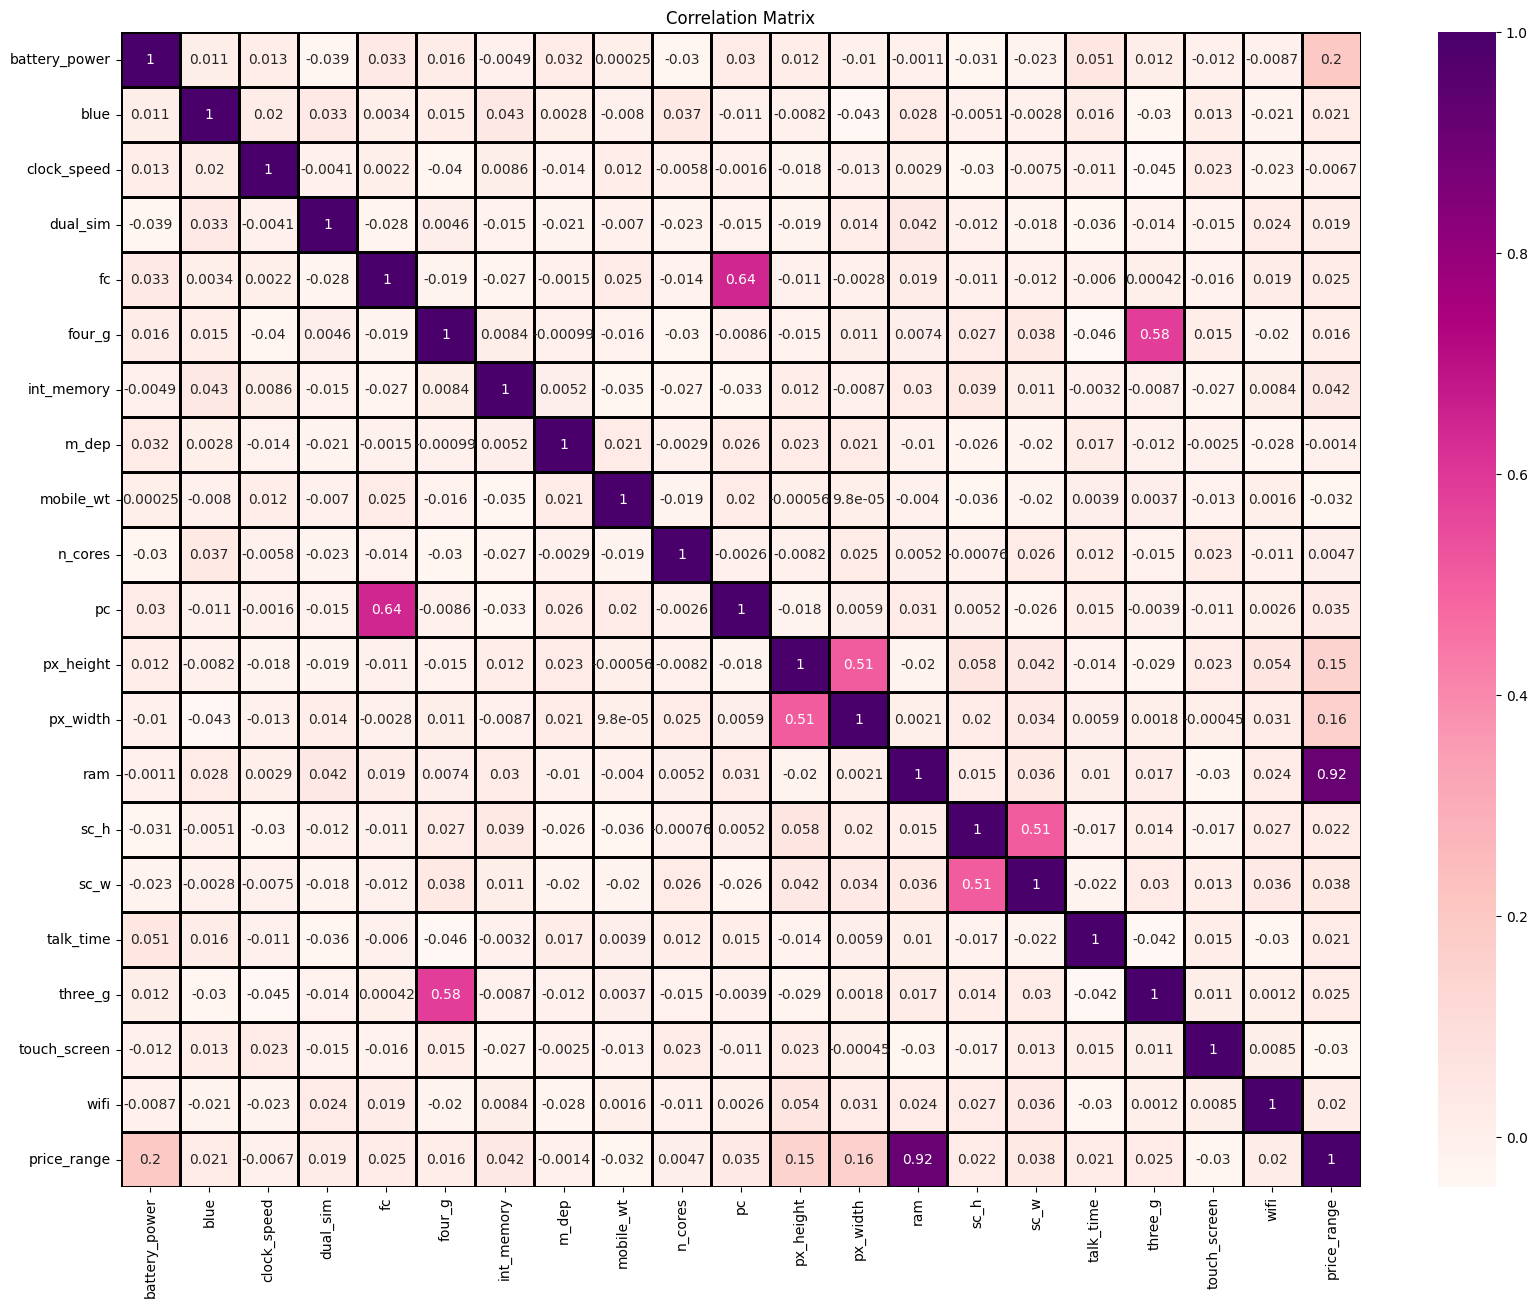

In [3]:
# sns.heatmap(df.corr(), cbar = True, linewidths=1, linecolor='black', cmap='plasma')
# sns.heatmap(df.corr(), annot= False, cmap='jet')

plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), cbar = True, annot = True, cmap='RdPu', linewidths=1, linecolor='black')
plt.title('Correlation Matrix')
plt.show()
# We notice a few key points here, which will be the basis of our analysis
# 1- ram has highest correlation with price_range, a correlation of 0.92
#    this is followed by battery_power, px_width, and px_height but they are not nearly as high as ram
#
# 2- there is a high correlation between px_width and px_height, 0.51
#    same can be said about screen_width and screen_height, 0.51
#    Which makes sense, as these are related to the dimensions and resolution
#
# 3- there is a high correlation between fc and pc, 0.64
#    which also makes sense as they are both related to the camera, and no
#    company would impair its primary high resolution camera with a secondary low resolution one
#
# 4- there is a high correlation between 3G and 4G, 0.58
#    This is highly logical, as 4G is an upgrade to 3G and both are strongly related
#
# 5- The rest of the features are not as strongly correlated


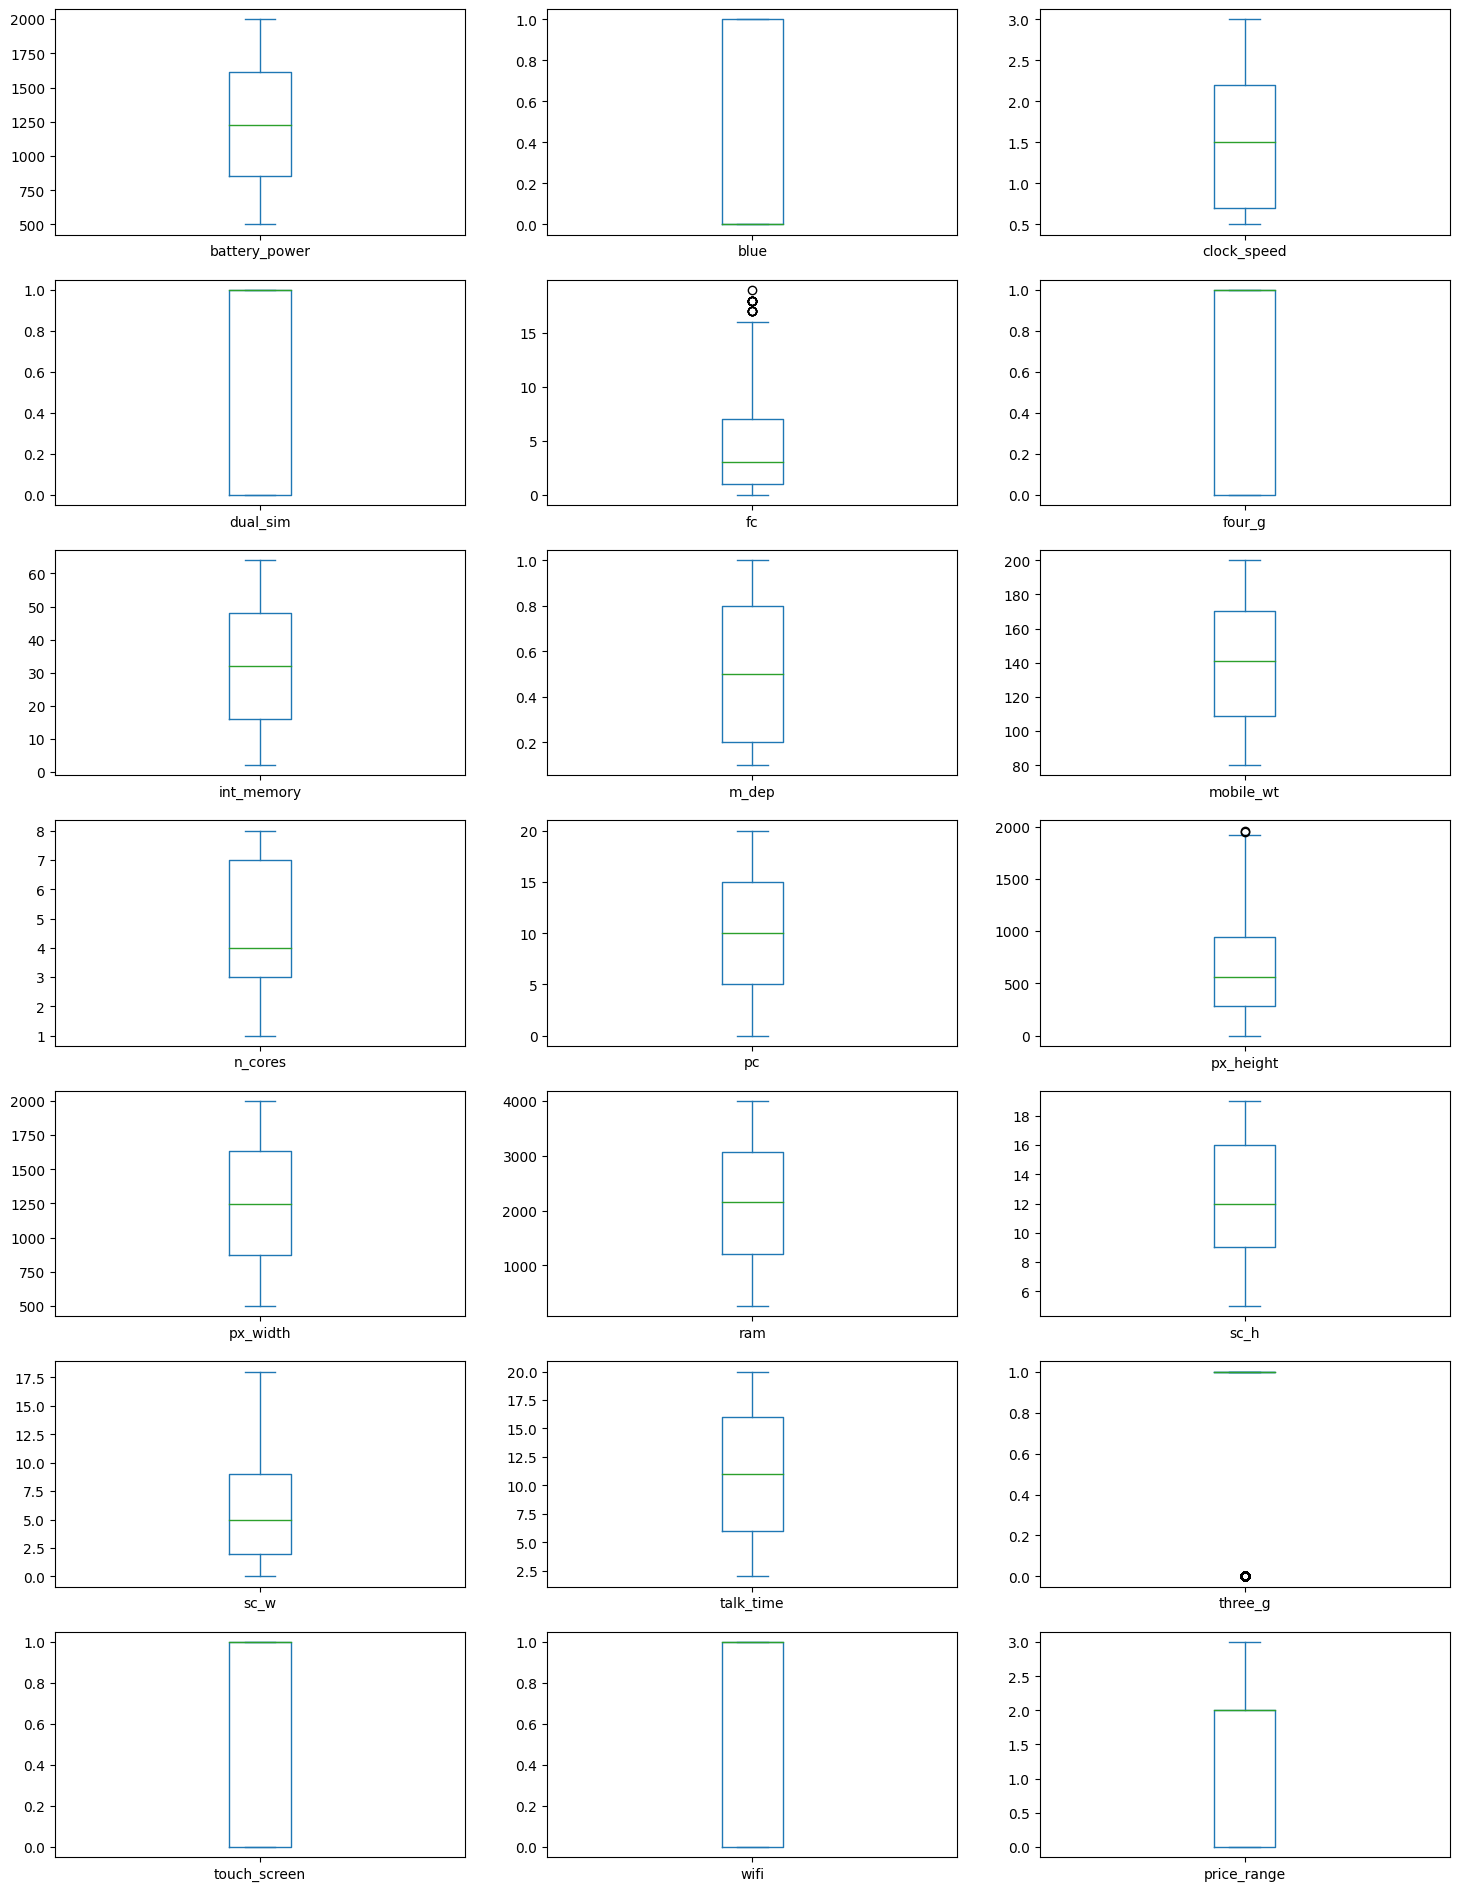

In [14]:
# Checking outliers
df.plot(kind = "box", subplots = True, figsize = (18, 24), layout = (7, 3))
plt.show()
# There are almost no outliers, except in the fc, px_height and 3G. Which makes sense
# since some phones have very high resolution front cameras, and use that as their selling point
# and phones that have no 3G are very rare nowadays, and are usually very old models

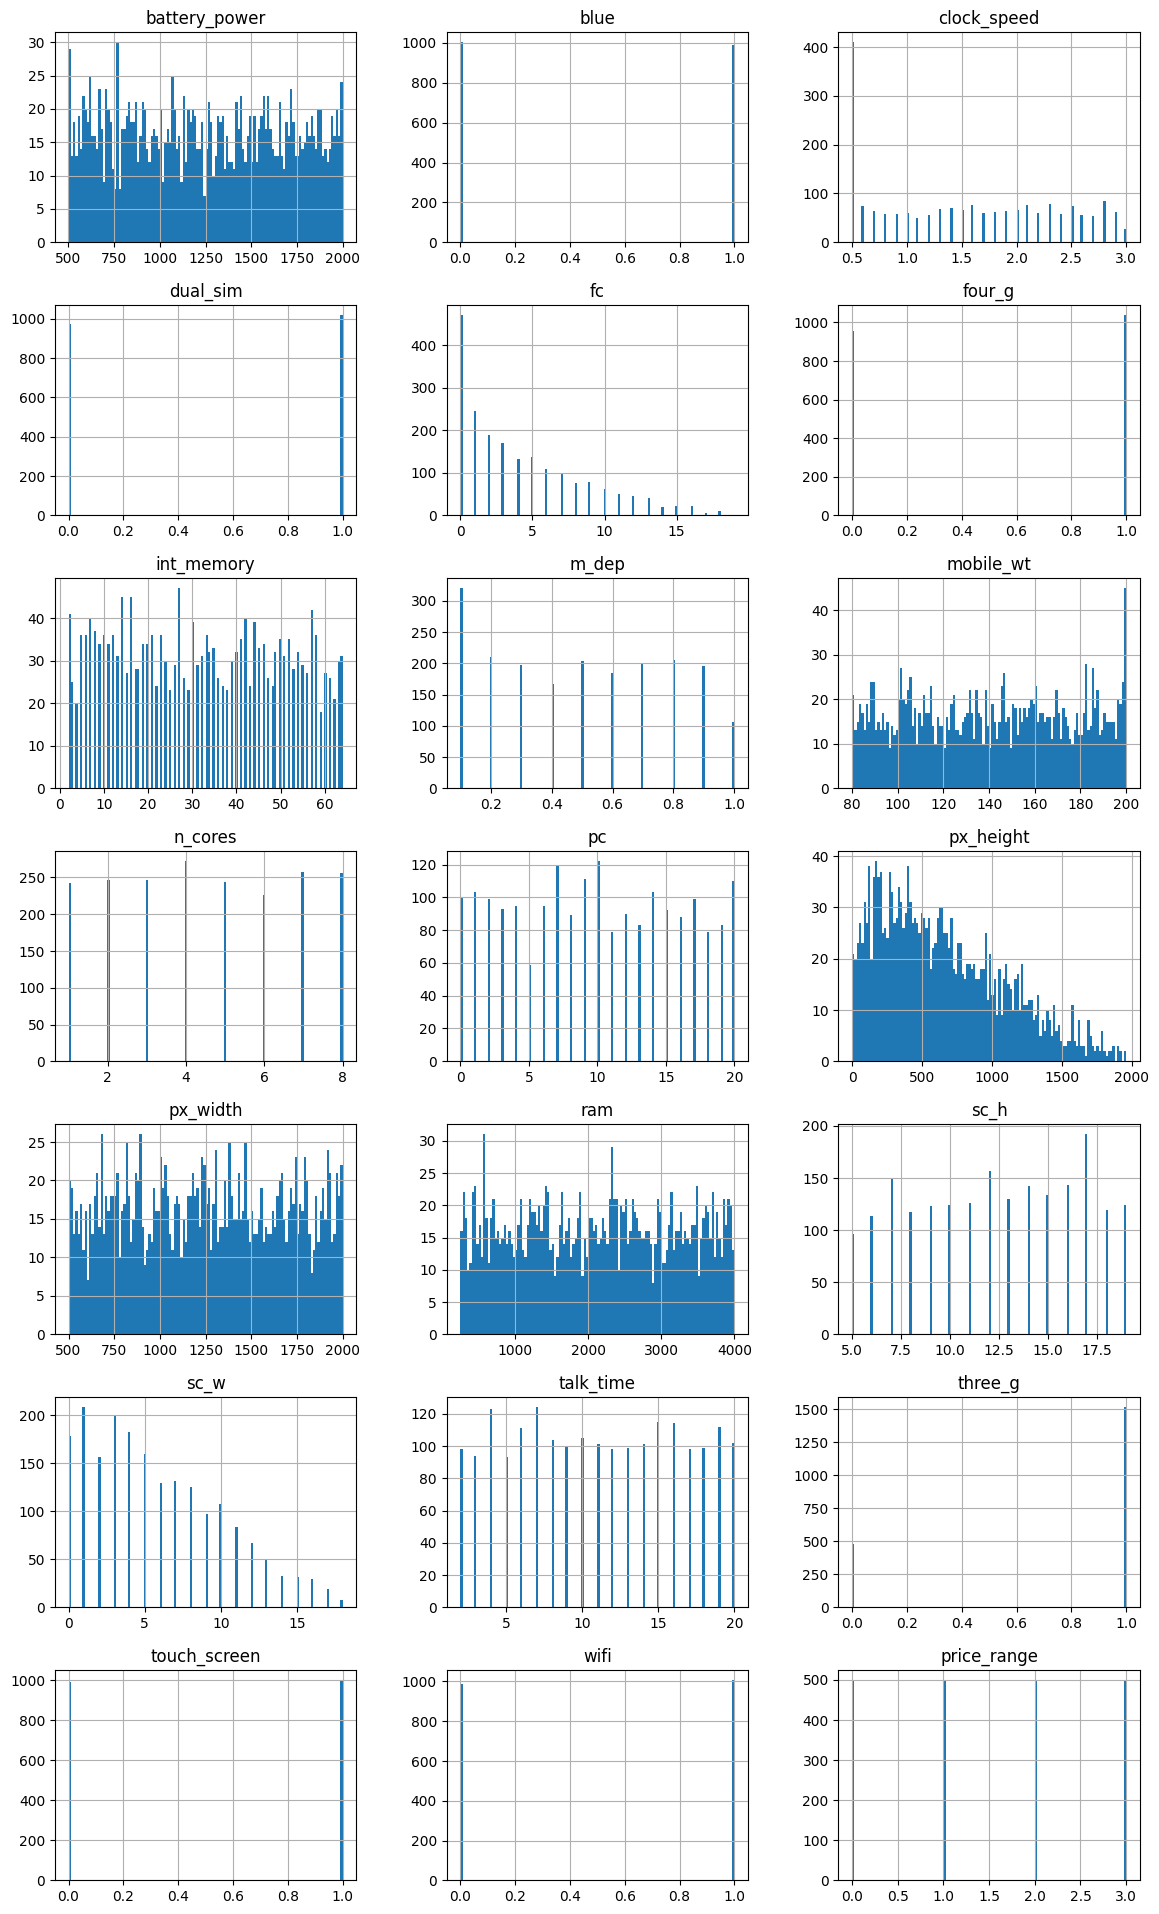

In [5]:
df.hist(bins=120, figsize=(14, 24), layout = (7, 3))
plt.show()
# Data does not appear to show any irregularities, and we can clearly see
# the px_height outliers through the histogram

In [6]:
# Initializing some variables with colours, this makes it
# easier in case the need to change the colour mid-project arises.
background_color = 'lightcoral'
graph_color = 'mistyrose'

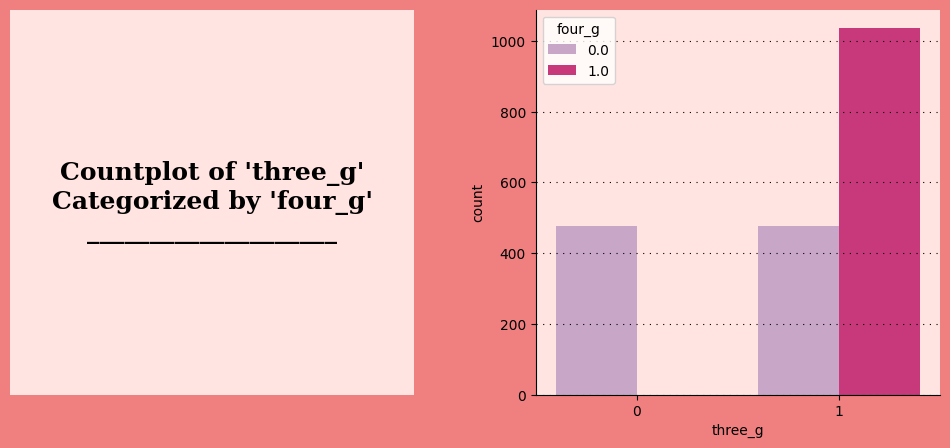

In [7]:
x_feature = 'three_g'  # The feature we want to analyse
y_feature = 'four_g'  # The feature we analyse against

fig = plt.figure(figsize=(12, 5))  # the figure size
gs = fig.add_gridspec(1, 2)        # making 3 grids (1 row, 3 columns)
gs.update(hspace=0.2, wspace=0.3)  # Changing the wspace would change the width of graphs, and might
                                   # cause them to overlap each other (0.05 for example)
                                   # Similarly for hspace (vertical elongation)

ax0 = fig.add_subplot(gs[0, 0])    # assigning a variable fo each grid
ax1 = fig.add_subplot(gs[0, 1])    # to be able to change each graph independently

axes = [ax0, ax1]                  # putting them in a list, to change the graph colour easily 
fig.patch.set_facecolor(background_color) # Setting the background colours for the wall behind the graphs


# Title
ax0.text(0.5, 0.5, "Countplot of '"+ x_feature +"'\nCategorized by '"+ y_feature +"'\n____________________", # determining the coordinates of the title
        horizontalalignment='center',
        verticalalignment='center', # determining the alignment
        fontsize=18, fontweight='bold', fontfamily='serif')
# determining the font size, type, weight, and colour

ax0.set_xticklabels([])
ax0.set_yticklabels([])
# Setting the labels (we chose to leave them empty)
ax0.tick_params(left=False, bottom=False)    # Removes the marking points at the axes of a graph
for s in ['top', 'right', 'left', 'bottom']:
    ax0.spines[s].set_visible(False)
# a for loop that removes the lines enclosing a graph

# Graph
# Drawing the x_feature against the y_feature
sns.countplot(x=x_feature, data=df, hue=y_feature, ax=ax1, palette='PuRd')
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1, 5))
ax1.set_xlabel(x_feature)  # Setting X-label
ax1.set_ylabel('count')   # Setting Y-label
for s in ['top', 'right']:
    ax1.spines[s].set_visible(False)

# Settings
for ax in axes:
    ax.set_facecolor(graph_color)
# Changing the colour of the graph itself, not the background

We notice that any mobile that supports 4G also supports 3G

This is a logical conclusion, as 4G is an upgrade to 3G

In [8]:
pd.crosstab(df['four_g'], df['three_g']).style.background_gradient(cmap="Blues")
# We notice that any mobile that has 4G, also has 3G
# This makes the 3G feature obsolete in case 4G is present

three_g,0,1
four_g,,
0.000000,476,478
1.000000,0,1037


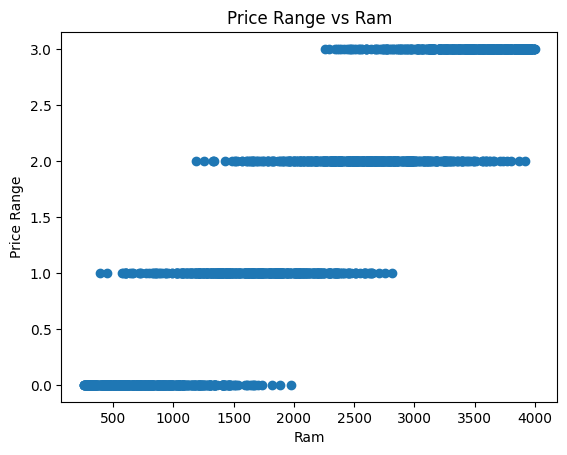

In [9]:
plt.scatter(data = df, y="price_range", x="ram")
plt.xlabel("Ram")
plt.ylabel("Price Range")
plt.title("Price Range vs Ram")
plt.show()
# We can clearly see that as the ram increases, the price range increases
# This is consistent with the correlation matrix we saw earlier, where they
# were both directly proportional, and strongly correlated

We can clearly see that as the ram increases, the price range increases This is consistent with the correlation matrix we saw earlier, where they were both strongly positively correlated.



Were we to add a 3rd dimension using the battery power, we would quickly notice that the battery power decreases as ram increases, which is quite intuitive, as a stronger processor would deplete the battery faster. This might also be a result of attempting to reduce the price a bit by using a lower quality battery, as some sort of trade-off.

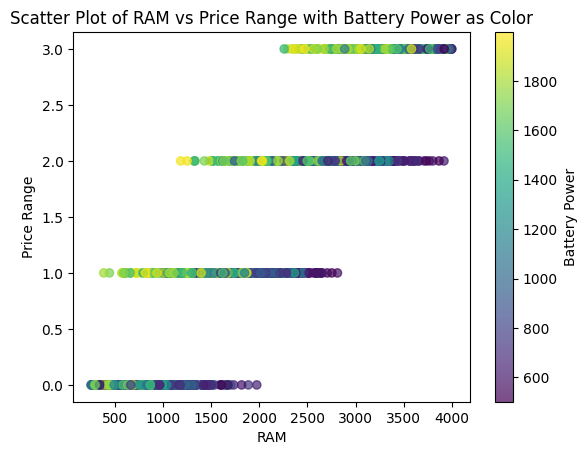

In [10]:
# Were we to add a third dimension to this graph using the battery power
# we would notice that as the ram increases, the battery power decreases
# this also makes sense, since a stronger processor would deplete the battery faster
# This is also consistent throughtout all the price ranges
# This may have been done as an attempt to reduce the price a bit. Some sort of trade-off
plt.scatter(data=df, x="ram", y="price_range", c=df["battery_power"], cmap='viridis', alpha=0.7)
plt.colorbar(label='Battery Power')
plt.xlabel('RAM')
plt.ylabel('Price Range')
plt.title('Scatter Plot of RAM vs Price Range with Battery Power as Color')
plt.show()

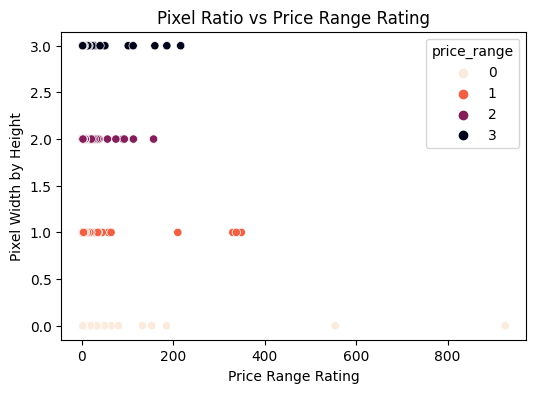

In [11]:
# plot price_range vs pixel width divided by its height
df['px_ratio'] = df['px_width'] / df['px_height']
plt.figure(figsize=(6, 4))
sns.scatterplot(x='px_ratio', y='price_range', data=df, palette='rocket_r', hue= 'price_range')
plt.title('Pixel Ratio vs Price Range Rating')
plt.xlabel('Price Range Rating')
plt.ylabel('Pixel Width by Height')
plt.show()

# drop the column so as not to affect the rest of the analysis
df = df.drop(columns = ['px_ratio'])

# We notice that no phone falls in the price range of 2 or 3 with a ratio
# higher than 300, which is a very interesting observation

We notice that no phone falls in the price range of 2 or 3 with a ratio higher than 300, which is a curious observation. This could mean that customers are not interested in phones that have unbalanced ratios between width and height.

# Conclusion

1- The price_range is mostly affected by ram. A higher ram would incur a higher price.

2- To alleviate the cost a little, battery power can be marginally reduced, ensuring that the phone is still usable for a reasonable amount of time, while reducing costs substantially.

3- Some features are strongly correlated to each other, such as 3G and 4G, as well as the front and back camera megapixels.

4- The ratio between the height and width of the phone is also a factor in determining the price range, as we saw that no phone with a ratio higher than 300 fell in the price range of 2 or 3.
